Name: Rahul Govindkumar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import re
import pandas as pd

Numpy is library for scientific computing in Python. It has efficient implementation of n-dimensional array (tensor) manupulations, which is useful for machine learning applications.

In [2]:
import numpy as np

We can convert a list into numpy array (tensor)  

In [3]:
b = [[1, 2, 4], [2, 6, 9]]
a = np.array(b)
a

array([[1, 2, 4],
       [2, 6, 9]])

We can check the dimensions of the array

In [4]:
a.shape

(2, 3)

We can apply simple arithmetic operation on all element of a tensor

In [5]:
a * 3

array([[ 3,  6, 12],
       [ 6, 18, 27]])

You can transpose a tensor
    

In [6]:
print(a.T.shape)
a.T

(3, 2)


array([[1, 2],
       [2, 6],
       [4, 9]])

You can apply aggregate functions on the whole tensor

In [7]:
np.sum(a)

24

or on one dimension of it

In [8]:
np.sum(a, axis=0)

array([ 3,  8, 13])

In [9]:
np.sum(a, axis=1)

array([ 7, 17])

We can do element-wise arithmetic operation on two tensors (of the same size)

In [10]:
c1 = np.array([[1, 2, 4], [2, 6, 9]])
c2 = np.array([[2, 3, 5], [1, 2, 1]])
c1 * c2

array([[ 2,  6, 20],
       [ 2, 12,  9]])

If you want to multiply all columns of a tensor by vector (for example if you want to multiply all data features by their lables) you need a trick. This multiplication shows up in calculating the gradients. 

In [11]:
a = np.array([[1, 2, 4], [2, 6, 9]])
b = np.array([1,-1])
print(a)
print(b)


[[1 2 4]
 [2 6 9]]
[ 1 -1]


Here we want to multiply the first row of a by 1 and the second row of a by -1. Simply multiplying a by b does not work because a and b do not have the same dimension

In [12]:
# a * b

To do this multiplication we first have to assume b has one column and then repeat the column of b with the number of columns in a. We use tile function to do that

In [13]:
b_repeat = np.tile(b,  (a.shape[1],1)).T
print(b_repeat.shape)
b_repeat

(2, 3)


array([[ 1,  1,  1],
       [-1, -1, -1]])

Now we can multiply each column of a by b:

In [14]:
a * b_repeat

array([[ 1,  2,  4],
       [-2, -6, -9]])

You can create inital random vector using numpy (using N(0,1)):

In [15]:
mu = 0 #mean
sigma = 1 #standard deviation
r = np.random.normal(mu,sigma, 1000) #draws 1000 samples from a normal distribution

We can apply functions on tensors

In [16]:
#implementation of Normal distribution
def normal(x, mu, sigma):
    return np.exp( -0.5 * ((x-mu)/sigma)**2)/np.sqrt(2.0*np.pi*sigma**2)

#probability of samples on the Normal distribution
probabilities = normal(r, mu, sigma)

Numpy has useful APIs for analysis. Here we plot the histogram of samples and also plot the probabilies to see if the samples follow the normal distribution.

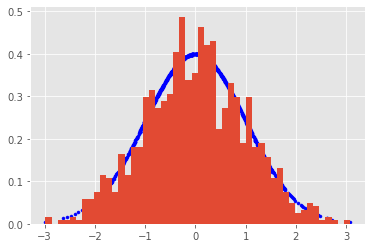

In [17]:
counts, bins = np.histogram(r,50,density=True)
plt.hist(bins[:-1], bins, weights=counts)
plt.scatter(r, probabilities, c='b', marker='.')

In [18]:
def read_data(filename):
    f = open(filename, 'r')
    p = re.compile(',')
    xdata = []
    ydata = []
    header = f.readline().strip()
    varnames = p.split(header)
    namehash = {}
    for l in f:
        li = p.split(l.strip())
        xdata.append([float(x) for x in li[:-1]])
        ydata.append(float(li[-1]))
    
    return np.array(xdata), np.array(ydata)


Assuming our data is x is available in numpy we use numpy to implement logistic regression


In [19]:
(xtrain_whole, ytrain_whole) = read_data('datasets/spambase-train.csv')
(xtest, ytest) = read_data('datasets/spambase-test.csv')

In [20]:
print("The shape of xtrain:", xtrain_whole.shape)
print("The shape of ytrain:", ytrain_whole.shape)
print("The shape of xtest:", xtest.shape)
print("The shape of ytest:", ytest.shape)

The shape of xtrain: (3601, 54)
The shape of ytrain: (3601,)
The shape of xtest: (1000, 54)
The shape of ytest: (1000,)


before training make we normalize the input data (features)

In [21]:
xmean = np.mean(xtrain_whole, axis=0)
xstd = np.std(xtrain_whole, axis=0)
xtrain_normal_whole = (xtrain_whole-xmean) / xstd
xtest_normal = (xtest-xmean) / xstd

We need to create a validation set. We create an array of indecies and permute it.

In [22]:
premute_indicies = np.random.permutation(np.arange(xtrain_whole.shape[0]))

We keep the first 2600 data points as the training data and rest as the validation data 

In [23]:
xtrain_normal = xtrain_normal_whole[premute_indicies[:2600]]
ytrain = ytrain_whole[premute_indicies[:2600]]
xval_normal = xtrain_normal_whole[premute_indicies[2600:]]
yval = ytrain_whole[premute_indicies[2600:]]

Initiallizing the weights and bias with random values from N(0,1)

In [24]:
weights = np.random.normal(0, 1, xtrain_normal.shape[1]);
bias = np.random.normal(0,1,1)

In [25]:
#the sigmoid function
def sigmoid(v):
    #return np.exp(-np.logaddexp(0, -v)) #numerically stable implementation of sigmoid function 
    return 1.0 / (1+np.exp(-v))

We can use dot-product from numpy to calculate the margin and pass it to the sigmoid function

In [26]:
#w: weight vector (numpy array of size n)
#b: numpy array of size 1
#returns p(y=1|x, w, b)
def prob(x, w, b):
    return sigmoid(np.dot(x,w) + b);

You can also calculate $l_2$ penalty using linalg library of numpy 

In [27]:
np.linalg.norm(weights)

7.464679606069855

$$\text{Cross Entropy Loss} = -\frac{1}{|D|}[\sum_{(y^i,\mathbf{x}^i)\in\mathcal{D}} 
 y^i \log p(y=1|\mathbf{x}^i;\mathbf{w},b)  +  (1-y^i) \log (1 - p(y=1|\mathbf{x}^i;\mathbf{w},b))]+\frac{\lambda}{2} \|\mathbf{w}\|^2 $$

In [28]:
#w: weight vector (numpy array of size n)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns the cross entropy loss
def loss(w, y_prob, y_true, lambda_):
    
    n_sample=len(w)
    
    cross_entropy_Loss=-(1/abs(n_sample))*np.sum((y_true * np.log(y_prob + 0.0000000000000000001)) + (1-y_true)*np.log(1-y_prob + 0.0000000000000000001)) + lambda_*0.5*np.linalg.norm(w)
    
    return cross_entropy_Loss
    

In [29]:
#x: input variables (data of size m x n with m data point and n features)
#w: weight vector (numpy array of size n)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns tuple of gradient w.r.t w and w.r.t to bias

def grad_w_b(x, w, y_prob, y_true, lambda_):
    
    n_samples=len(x)
#     grad_w = np.zeros(w.shape)
#     grad_b = 0.0
    
    grad_w = (1/n_samples) * np.dot(x.T, (y_prob - y_true))
    grad_b = (1/n_samples) * np.sum(y_prob -y_true)
    
    
    
    return (grad_w,grad_b)

In [30]:
cost_list=[]

In [31]:

#lambda_ is the coeffienct of l2 norm penalty
#learning_rate is learning rate of gradient descent algorithm
#max_iter determines the maximum number of iterations if the gradients descent does not converge.
#continue the training while gradient > 0.1 or the number steps is less max_iter

#returns model as tuple of (weights,bias)

def fit(x, y_true, learning_rate, lambda_, max_iter, verbose=0):
    weights = np.random.normal(0, 1, x.shape[1]);
    bias = np.random.normal(0,1,1)
    
    for i in range (max_iter):
        
        y_prod = prob(x, weights, bias)
        dw,db = grad_w_b(x, weights, y_prod, y_true, lambda_)
        
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db
        
        cross_loss = loss(weights, y_prod, y_true, lambda_)
        
        if verbose:
            print("Iteration Number: "+str(i)+"\nLoss: "+ str(cross_loss)+"\nl2 norm of gradients: "+str(np.linalg.norm(dw))+"\nl2 norm of weights: "+str(np.linalg.norm(weights)))
            print("---------------------")
            cost_list.append(cross_loss)
    #change the condition appropriately
#     while True:
        
#         if verbose: #verbose is used for debugging purposes
#             #print iteration number, loss, l2 norm of gradients, l2 norm of weights
#             pass
    return (weights, bias)

In [32]:
def accuracy(x, y_true, model):
    w, b = model
    return np.sum((prob(x, w, b)>0.5).astype(np.double) == y_true)  / y_true.shape[0]

In [33]:
learning_rate = 0.001
lambda_ = 1.0
max_iter = 10000
model = fit(xtrain_normal, ytrain, learning_rate, lambda_, max_iter, verbose=1) #keep the verbose on here for your submissions

Iteration Number: 0
Loss: 165.08992278766098
l2 norm of gradients: 1.5712841571143472
l2 norm of weights: 6.749898914526341
---------------------
Iteration Number: 1
Loss: 164.96958129222804
l2 norm of gradients: 1.5706966434456426
l2 norm of weights: 6.749433510757873
---------------------
Iteration Number: 2
Loss: 164.8493290889799
l2 norm of gradients: 1.5701090226134353
l2 norm of weights: 6.74896845133604
---------------------
Iteration Number: 3
Loss: 164.7291661691766
l2 norm of gradients: 1.5695212957976998
l2 norm of weights: 6.748503736038181
---------------------
Iteration Number: 4
Loss: 164.6090925240257
l2 norm of gradients: 1.5689334641718993
l2 norm of weights: 6.748039364641625
---------------------
Iteration Number: 5
Loss: 164.48910814463196
l2 norm of gradients: 1.5683455289030148
l2 norm of weights: 6.747575336923698
---------------------
Iteration Number: 6
Loss: 164.36921302180806
l2 norm of gradients: 1.5677574911515728
l2 norm of weights: 6.747111652661718
----

Iteration Number: 483
Loss: 116.852086244423
l2 norm of gradients: 1.2853572342551092
l2 norm of weights: 6.561169251335525
---------------------
Iteration Number: 484
Loss: 116.77154382658189
l2 norm of gradients: 1.2847472598981333
l2 norm of weights: 6.560845504866594
---------------------
Iteration Number: 485
Loss: 116.69107784232541
l2 norm of gradients: 1.284137018848067
l2 norm of weights: 6.5605220033899805
---------------------
Iteration Number: 486
Loss: 116.61068828800947
l2 norm of gradients: 1.2835265101325593
l2 norm of weights: 6.560198746704477
---------------------
Iteration Number: 487
Loss: 116.53037515956541
l2 norm of gradients: 1.2829157327954765
l2 norm of weights: 6.55987573460871
---------------------
Iteration Number: 488
Loss: 116.45013845327075
l2 norm of gradients: 1.2823046858970677
l2 norm of weights: 6.559552966901149
---------------------
Iteration Number: 489
Loss: 116.36997816570339
l2 norm of gradients: 1.281693368514131
l2 norm of weights: 6.559230

Iteration Number: 895
Loss: 89.93673449918235
l2 norm of gradients: 1.025064858716524
l2 norm of weights: 6.44602539392263
---------------------
Iteration Number: 896
Loss: 89.88545119162143
l2 norm of gradients: 1.0244747085921566
l2 norm of weights: 6.445784175272216
---------------------
Iteration Number: 897
Loss: 89.83422668998291
l2 norm of gradients: 1.0238849453706727
l2 norm of weights: 6.445543113423634
---------------------
Iteration Number: 898
Loss: 89.78306092181194
l2 norm of gradients: 1.0232955683361167
l2 norm of weights: 6.445302208196849
---------------------
Iteration Number: 899
Loss: 89.73195381510197
l2 norm of gradients: 1.0227065767606516
l2 norm of weights: 6.44506145941209
---------------------
Iteration Number: 900
Loss: 89.68090529756849
l2 norm of gradients: 1.0221179699048268
l2 norm of weights: 6.444820866889855
---------------------
Iteration Number: 901
Loss: 89.62991529757848
l2 norm of gradients: 1.021529747017839
l2 norm of weights: 6.4445804304509

Iteration Number: 1378
Loss: 70.91612232256279
l2 norm of gradients: 0.7751335603834165
l2 norm of weights: 6.344809607716692
---------------------
Iteration Number: 1379
Loss: 70.8867002409596
l2 norm of gradients: 0.7746887088181973
l2 norm of weights: 6.344626315720609
---------------------
Iteration Number: 1380
Loss: 70.85731163422072
l2 norm of gradients: 0.7742441881620368
l2 norm of weights: 6.3444431119112625
---------------------
Iteration Number: 1381
Loss: 70.8279564581529
l2 norm of gradients: 0.7737999984864958
l2 norm of weights: 6.344259996179568
---------------------
Iteration Number: 1382
Loss: 70.79863466862678
l2 norm of gradients: 0.7733561398624748
l2 norm of weights: 6.344076968416576
---------------------
Iteration Number: 1383
Loss: 70.76934622179176
l2 norm of gradients: 0.7729126123602398
l2 norm of weights: 6.34389402851347
---------------------
Iteration Number: 1384
Loss: 70.74009107352218
l2 norm of gradients: 0.7724694160494446
l2 norm of weights: 6.3437

Iteration Number: 1917
Loss: 58.89553638617321
l2 norm of gradients: 0.5840475873191184
l2 norm of weights: 6.2564136831764126
---------------------
Iteration Number: 1918
Loss: 58.878733863952405
l2 norm of gradients: 0.5837793645988986
l2 norm of weights: 6.256265384145387
---------------------
Iteration Number: 1919
Loss: 58.86194659462987
l2 norm of gradients: 0.583511416462069
l2 norm of weights: 6.25611713243959
---------------------
Iteration Number: 1920
Loss: 58.84517455566259
l2 norm of gradients: 0.5832437425376165
l2 norm of weights: 6.25596892801266
---------------------
Iteration Number: 1921
Loss: 58.82841772473166
l2 norm of gradients: 0.5829763424543067
l2 norm of weights: 6.255820770818319
---------------------
Iteration Number: 1922
Loss: 58.81167607938357
l2 norm of gradients: 0.5827092158406912
l2 norm of weights: 6.2556726608103705
---------------------
Iteration Number: 1923
Loss: 58.79494959733685
l2 norm of gradients: 0.582442362325112
l2 norm of weights: 6.255

Iteration Number: 2375
Loss: 52.50569419037724
l2 norm of gradients: 0.4843096772738397
l2 norm of weights: 6.192829052866971
---------------------
Iteration Number: 2376
Loss: 52.494090813370605
l2 norm of gradients: 0.4841316735723501
l2 norm of weights: 6.192698588058927
---------------------
Iteration Number: 2377
Loss: 52.48249586585039
l2 norm of gradients: 0.483953803780562
l2 norm of weights: 6.192568155448525
---------------------
Iteration Number: 2378
Loss: 52.47090933841179
l2 norm of gradients: 0.4837760677000661
l2 norm of weights: 6.192437755011836
---------------------
Iteration Number: 2379
Loss: 52.45933122169106
l2 norm of gradients: 0.48359846513293864
l2 norm of weights: 6.19230738672496
---------------------
Iteration Number: 2380
Loss: 52.44776150633282
l2 norm of gradients: 0.48342099588174203
l2 norm of weights: 6.192177050564019
---------------------
Iteration Number: 2381
Loss: 52.436200183008914
l2 norm of gradients: 0.4832436597495232
l2 norm of weights: 6.

---------------------
Iteration Number: 2790
Loss: 48.31964589369701
l2 norm of gradients: 0.4201211741142632
l2 norm of weights: 6.1411960704841215
---------------------
Iteration Number: 2791
Loss: 48.31088442098876
l2 norm of gradients: 0.4199866159937477
l2 norm of weights: 6.141077164881194
---------------------
Iteration Number: 2792
Loss: 48.30212848832877
l2 norm of gradients: 0.4198521427968453
l2 norm of weights: 6.140958283284091
---------------------
Iteration Number: 2793
Loss: 48.29337809053443
l2 norm of gradients: 0.41971775446271736
l2 norm of weights: 6.140839425676484
---------------------
Iteration Number: 2794
Loss: 48.28463322235574
l2 norm of gradients: 0.4195834509306852
l2 norm of weights: 6.140720592042061
---------------------
Iteration Number: 2795
Loss: 48.27589387851914
l2 norm of gradients: 0.4194492321402291
l2 norm of weights: 6.140601782364523
---------------------
Iteration Number: 2796
Loss: 48.26716005381203
l2 norm of gradients: 0.41931509803098815

Iteration Number: 3265
Loss: 44.69904051890746
l2 norm of gradients: 0.36490228406099795
l2 norm of weights: 6.087156389455575
---------------------
Iteration Number: 3266
Loss: 44.692406282354774
l2 norm of gradients: 0.36480284582278316
l2 norm of weights: 6.087047281369316
---------------------
Iteration Number: 3267
Loss: 44.685775613224905
l2 norm of gradients: 0.3647034720789784
l2 norm of weights: 6.086938190978746
---------------------
Iteration Number: 3268
Loss: 44.67914850827286
l2 norm of gradients: 0.36460416279148583
l2 norm of weights: 6.0868291182733705
---------------------
Iteration Number: 3269
Loss: 44.672524964248794
l2 norm of gradients: 0.36450491792220097
l2 norm of weights: 6.086720063242711
---------------------
Iteration Number: 3270
Loss: 44.665904977923034
l2 norm of gradients: 0.3644057374330121
l2 norm of weights: 6.086611025876297
---------------------
Iteration Number: 3271
Loss: 44.65928854601908
l2 norm of gradients: 0.36430662128580027
l2 norm of wei

Iteration Number: 3722
Loss: 41.992891115774285
l2 norm of gradients: 0.32556675876020397
l2 norm of weights: 6.038989592484522
---------------------
Iteration Number: 3723
Loss: 41.98759495605461
l2 norm of gradients: 0.3254927513991677
l2 norm of weights: 6.03888762982062
---------------------
Iteration Number: 3724
Loss: 41.982301176265686
l2 norm of gradients: 0.32541879085071057
l2 norm of weights: 6.038785681022631
---------------------
Iteration Number: 3725
Loss: 41.97700977436333
l2 norm of gradients: 0.32534487707764703
l2 norm of weights: 6.038683746083986
---------------------
Iteration Number: 3726
Loss: 41.97172074833837
l2 norm of gradients: 0.32527101004280773
l2 norm of weights: 6.0385818249981265
---------------------
Iteration Number: 3727
Loss: 41.96643409618176
l2 norm of gradients: 0.32519718970904066
l2 norm of weights: 6.0384799177584965
---------------------
Iteration Number: 3728
Loss: 41.96114981588423
l2 norm of gradients: 0.32512341603921
l2 norm of weights

Iteration Number: 4246
Loss: 39.5017352403531
l2 norm of gradients: 0.2923778177940406
l2 norm of weights: 5.9873227169669185
---------------------
Iteration Number: 4247
Loss: 39.49745479117843
l2 norm of gradients: 0.29232374106219766
l2 norm of weights: 5.987227255340721
---------------------
Iteration Number: 4248
Loss: 39.493175912647345
l2 norm of gradients: 0.2922696946013269
l2 norm of weights: 5.987131804877892
---------------------
Iteration Number: 4249
Loss: 39.48889860362282
l2 norm of gradients: 0.2922156783858938
l2 norm of weights: 5.987036365574417
---------------------
Iteration Number: 4250
Loss: 39.48462286293746
l2 norm of gradients: 0.2921616923903859
l2 norm of weights: 5.986940937426281
---------------------
Iteration Number: 4251
Loss: 39.48034868945034
l2 norm of gradients: 0.29210773658931305
l2 norm of weights: 5.986845520429476
---------------------
Iteration Number: 4252
Loss: 39.47607608202186
l2 norm of gradients: 0.2920538109572067
l2 norm of weights: 5

Iteration Number: 4886
Loss: 37.04045667203122
l2 norm of gradients: 0.26298862307115983
l2 norm of weights: 5.928356077037348
---------------------
Iteration Number: 4887
Loss: 37.03698925554509
l2 norm of gradients: 0.26294956079244985
l2 norm of weights: 5.928267064675596
---------------------
Iteration Number: 4888
Loss: 37.03352286533701
l2 norm of gradients: 0.26291051634316287
l2 norm of weights: 5.9281780614659265
---------------------
Iteration Number: 4889
Loss: 37.03005750081109
l2 norm of gradients: 0.2628714897090309
l2 norm of weights: 5.92808906740588
---------------------
Iteration Number: 4890
Loss: 37.02659316134768
l2 norm of gradients: 0.2628324808757993
l2 norm of weights: 5.928000082493
---------------------
Iteration Number: 4891
Loss: 37.02312984633906
l2 norm of gradients: 0.26279348982922696
l2 norm of weights: 5.927911106724832
---------------------
Iteration Number: 4892
Loss: 37.01966755517
l2 norm of gradients: 0.262754516555086
l2 norm of weights: 5.92782

Iteration Number: 5507
Loss: 35.06344778025239
l2 norm of gradients: 0.24167064784377656
l2 norm of weights: 5.874752499133805
---------------------
Iteration Number: 5508
Loss: 35.060518727509276
l2 norm of gradients: 0.24164037793362014
l2 norm of weights: 5.874668752667155
---------------------
Iteration Number: 5509
Loss: 35.057590408015535
l2 norm of gradients: 0.2416101191569837
l2 norm of weights: 5.874585014082399
---------------------
Iteration Number: 5510
Loss: 35.054662821402665
l2 norm of gradients: 0.2415798715059692
l2 norm of weights: 5.874501283377826
---------------------
Iteration Number: 5511
Loss: 35.05173596731159
l2 norm of gradients: 0.2415496349726865
l2 norm of weights: 5.874417560551723
---------------------
Iteration Number: 5512
Loss: 35.048809845393166
l2 norm of gradients: 0.24151940954925272
l2 norm of weights: 5.874333845602382
---------------------
Iteration Number: 5513
Loss: 35.045884455276806
l2 norm of gradients: 0.24148919522779264
l2 norm of weig

---------------------
Iteration Number: 6167
Loss: 33.274580153276275
l2 norm of gradients: 0.22378889985188022
l2 norm of weights: 5.821118246319107
---------------------
Iteration Number: 6168
Loss: 33.272068596136606
l2 norm of gradients: 0.22376456684426332
l2 norm of weights: 5.821039365118904
---------------------
Iteration Number: 6169
Loss: 33.269557585568336
l2 norm of gradients: 0.2237402410836557
l2 norm of weights: 5.820960490825444
---------------------
Iteration Number: 6170
Loss: 33.267047121354466
l2 norm of gradients: 0.22371592256578102
l2 norm of weights: 5.820881623437445
---------------------
Iteration Number: 6171
Loss: 33.26453720326547
l2 norm of gradients: 0.22369161128636655
l2 norm of weights: 5.820802762953622
---------------------
Iteration Number: 6172
Loss: 33.26202783108881
l2 norm of gradients: 0.2236673072411436
l2 norm of weights: 5.820723909372696
---------------------
Iteration Number: 6173
Loss: 33.25951900459875
l2 norm of gradients: 0.22364301042

Iteration Number: 6785
Loss: 31.818756043097906
l2 norm of gradients: 0.20998570675679676
l2 norm of weights: 5.773638962462445
---------------------
Iteration Number: 6786
Loss: 31.816545015740353
l2 norm of gradients: 0.2099651654013755
l2 norm of weights: 5.7735641224244105
---------------------
Iteration Number: 6787
Loss: 31.81433442134114
l2 norm of gradients: 0.20994462924329774
l2 norm of weights: 5.773489288582176
---------------------
Iteration Number: 6788
Loss: 31.81212425975061
l2 norm of gradients: 0.2099240982800155
l2 norm of weights: 5.7734144609347045
---------------------
Iteration Number: 6789
Loss: 31.80991453081423
l2 norm of gradients: 0.20990357250898292
l2 norm of weights: 5.773339639480965
---------------------
Iteration Number: 6790
Loss: 31.807705234378133
l2 norm of gradients: 0.2098830519276559
l2 norm of weights: 5.773264824219923
---------------------
Iteration Number: 6791
Loss: 31.80549637029439
l2 norm of gradients: 0.20986253653349252
l2 norm of weig

Iteration Number: 7363
Loss: 30.608468664066333
l2 norm of gradients: 0.19890581653356595
l2 norm of weights: 5.731382922978272
---------------------
Iteration Number: 7364
Loss: 30.606484970912526
l2 norm of gradients: 0.1988879078258725
l2 norm of weights: 5.731311501561179
---------------------
Iteration Number: 7365
Loss: 30.60450163512955
l2 norm of gradients: 0.19887000310793346
l2 norm of weights: 5.731240085792447
---------------------
Iteration Number: 7366
Loss: 30.602518656598555
l2 norm of gradients: 0.1988521023780344
l2 norm of weights: 5.731168675671205
---------------------
Iteration Number: 7367
Loss: 30.600536035209352
l2 norm of gradients: 0.19883420563446214
l2 norm of weights: 5.731097271196587
---------------------
Iteration Number: 7368
Loss: 30.59855377084897
l2 norm of gradients: 0.19881631287550444
l2 norm of weights: 5.731025872367725
---------------------
Iteration Number: 7369
Loss: 30.596571863408283
l2 norm of gradients: 0.19879842409945014
l2 norm of wei

Iteration Number: 8008
Loss: 29.39857962297081
l2 norm of gradients: 0.18811381731522395
l2 norm of weights: 5.686452254099189
---------------------
Iteration Number: 8009
Loss: 29.396805364717842
l2 norm of gradients: 0.18809816731419063
l2 norm of weights: 5.686384305888386
---------------------
Iteration Number: 8010
Loss: 29.395031401557077
l2 norm of gradients: 0.18808252038292614
l2 norm of weights: 5.6863163628129225
---------------------
Iteration Number: 8011
Loss: 29.393257733403576
l2 norm of gradients: 0.18806687652025225
l2 norm of weights: 5.686248424872069
---------------------
Iteration Number: 8012
Loss: 29.391484360173408
l2 norm of gradients: 0.18805123572499133
l2 norm of weights: 5.6861804920650965
---------------------
Iteration Number: 8013
Loss: 29.389711281787296
l2 norm of gradients: 0.18803559799596659
l2 norm of weights: 5.6861125643912755
---------------------
Iteration Number: 8014
Loss: 29.387938498157467
l2 norm of gradients: 0.1880199633320017
l2 norm o

Iteration Number: 8546
Loss: 28.48463566793038
l2 norm of gradients: 0.1801093281723457
l2 norm of weights: 5.650619712421041
---------------------
Iteration Number: 8547
Loss: 28.48300907375083
l2 norm of gradients: 0.18009517560075106
l2 norm of weights: 5.650554426139074
---------------------
Iteration Number: 8548
Loss: 28.481382734853774
l2 norm of gradients: 0.18008102555300387
l2 norm of weights: 5.650489144624659
---------------------
Iteration Number: 8549
Loss: 28.479756651175265
l2 norm of gradients: 0.180066878028238
l2 norm of weights: 5.650423867877157
---------------------
Iteration Number: 8550
Loss: 28.478130822646012
l2 norm of gradients: 0.18005273302558794
l2 norm of weights: 5.6503585958959235
---------------------
Iteration Number: 8551
Loss: 28.47650524920451
l2 norm of gradients: 0.18003859054418858
l2 norm of weights: 5.65029332868032
---------------------
Iteration Number: 8552
Loss: 28.47487993078083
l2 norm of gradients: 0.18002445058317545
l2 norm of weight

Iteration Number: 9055
Loss: 27.688331039630615
l2 norm of gradients: 0.17321432650726792
l2 norm of weights: 5.617991759944384
---------------------
Iteration Number: 9056
Loss: 27.686826391817952
l2 norm of gradients: 0.1732013565624103
l2 norm of weights: 5.617928820548498
---------------------
Iteration Number: 9057
Loss: 27.685321968816364
l2 norm of gradients: 0.17318838875775797
l2 norm of weights: 5.617865885611806
---------------------
Iteration Number: 9058
Loss: 27.68381777056781
l2 norm of gradients: 0.17317542309265618
l2 norm of weights: 5.617802955133736
---------------------
Iteration Number: 9059
Loss: 27.68231379702203
l2 norm of gradients: 0.1731624595664507
l2 norm of weights: 5.6177400291137145
---------------------
Iteration Number: 9060
Loss: 27.68081004812071
l2 norm of gradients: 0.17314949817848763
l2 norm of weights: 5.617677107551171
---------------------
Iteration Number: 9061
Loss: 27.679306523812315
l2 norm of gradients: 0.17313653892811323
l2 norm of wei

Iteration Number: 9680
Loss: 26.78968342366266
l2 norm of gradients: 0.16550081954701404
l2 norm of weights: 5.579501742984526
---------------------
Iteration Number: 9681
Loss: 26.78830944157998
l2 norm of gradients: 0.16548907129741416
l2 norm of weights: 5.5794414837055015
---------------------
Iteration Number: 9682
Loss: 26.78693565388123
l2 norm of gradients: 0.16547732483253264
l2 norm of weights: 5.579381228550451
---------------------
Iteration Number: 9683
Loss: 26.785562060519503
l2 norm of gradients: 0.1654655801518697
l2 norm of weights: 5.579320977518871
---------------------
Iteration Number: 9684
Loss: 26.784188661455982
l2 norm of gradients: 0.165453837254926
l2 norm of weights: 5.57926073061026
---------------------
Iteration Number: 9685
Loss: 26.78281545664012
l2 norm of gradients: 0.16544209614120214
l2 norm of weights: 5.579200487824117
---------------------
Iteration Number: 9686
Loss: 26.78144244603344
l2 norm of gradients: 0.165430356810199
l2 norm of weights: 

In [34]:
print("Train accuracy: ", accuracy(xtrain_normal, ytrain, model))

Train accuracy:  0.8307692307692308


In [35]:
#grid search for finding the best hyperparams and model

best_model = None
best_val = -1
for lr in [0.01, 0.001, 0.0001, 0.00001]:
    for la in [5, 2, 1, 0.1, 0.01]:
        model = fit(xtrain_normal, ytrain, lr, la, 10000, verbose=0)
        val_acc = accuracy(xval_normal, yval, model)
        print(lr, la, val_acc)
        if val_acc > best_val:
            best_val = val_acc
            best_model = model
    

0.01 5 0.9280719280719281
0.01 2 0.922077922077922
0.01 1 0.9250749250749251
0.01 0.1 0.9270729270729271
0.01 0.01 0.9180819180819181
0.001 5 0.8111888111888111
0.001 2 0.8231768231768232
0.001 1 0.8221778221778222
0.001 0.1 0.8251748251748252
0.001 0.01 0.8331668331668332
0.0001 5 0.6823176823176823
0.0001 2 0.7612387612387612
0.0001 1 0.46053946053946054
0.0001 0.1 0.7462537462537463
0.0001 0.01 0.7412587412587412
1e-05 5 0.5894105894105894
1e-05 2 0.5724275724275725
1e-05 1 0.4965034965034965
1e-05 0.1 0.5634365634365635
1e-05 0.01 0.4565434565434565


In [36]:
print("Test accuracy: ", accuracy(xtest_normal, ytest, best_model))

Test accuracy:  0.941


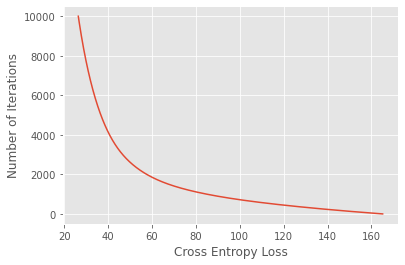

In [37]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('Cross Entropy Loss')
ax.set_ylabel('Number of Iterations')
ax.plot(cost_list,np.arange(max_iter))
plt.show()